In [507]:
# These lines import the modules.
import numpy as np
from datascience import *
from pandas import *
import glob

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import os

I'm using the numpy, pandas and glob modules, as well as some functions from matplotlib.

I'm also using the datascience module developed by Professor John DeNero, Professor David Culler, Sam Lau, and Alvin Wan at the University of California, Berkeley. This is an easy-to-use subset of the pandas module developed for data analysis and visualization. It's awesome! Documentation for the module can be found here: http://datascience.readthedocs.io/en/master/. The datascience module needs to be installed before you can use it and here's the github link on how to do that: https://github.com/data-8/datascience. 

# Graphing Meteorological Data to Find PBL Height

Hello! Here I will be graphing the profiles of various meteorological attributes collected on flights of the Alpha Jet Atmospheric Experiment (AJAX) based at NASA Ames to detect variances that demonstrate the height of the planetary boundary layer (PBL) for each flight. 

## Load All Meteorological Files

This block loads all the AJAX MMS (meteorological data) from flights between 07/17/2013 to 06/15/2016 into local variables named in the format of AJet_yyyymmdd.

The files being loaded are located in the same folder as this notebook (this notebook is in my Desktop, and the files are in Desktop > complete_ajax_data > metdata). The original AJAX MMS files were in an ICT format with the metadata in the first 50 rows. The headers were removed and the files were converted to CSV and divided into columned tables (the original files had all one row for each data point, and the various attributes of the data were divided by commas) using a Microsoft Powershell script which can be found here: http://tinyurl.com/developcode. The files can also be converted manually by opening the ICT file in Microsoft Excel, deleting the first 50 rows (for removing metadata in the header), then using the Text to Columns feature in Excel (select column A, Data > Text to Columns > choose 'Delimited' > choose 'Comma' for Delimiter, 'Treat consecutive delimiters as one' is 'no') and then Save As > choose 'CSV (comma delimited)' for 'Save as type' underneath file name.


In [508]:
#AJet_20130717=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20130717_R0.csvout.csv')
#this data is not delimited and therefore can't be used right now
AJet_20130910=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20130910_R0.csvout.csv')
AJet_20130912=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20130912_R0.csvout.csv')
AJet_20130918=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20130918_R0.csvout.csv')
AJet_20131029=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20131029_R1.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20131118=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20131118_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20131126=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20131126_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20131205=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20131205_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20140213=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140213_R1.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20140305=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140305_R1.csvout.csv')
AJet_20140313=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140313_R0.csvout.csv')
AJet_20140403=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140403_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20140424=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140424_R0.csvout.csv')
AJet_20140501=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140501_R0.csvout.csv')
AJet_20140508=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140508_R0.csvout.csv')
AJet_20140514=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140514_R0.csvout.csv')
AJet_20140519=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140519_R0.csvout.csv')
AJet_20140528=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140528_R0.csvout.csv')
AJet_20140603=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140603_R0.csvout.csv')
AJet_20140604=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140604_R0.csvout.csv')
AJet_20140610=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140610_R0.csvout.csv')
AJet_20140618=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140618_R0.csvout.csv')
AJet_20140624=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140624_R0.csvout.csv')
AJet_20140625=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140625_R0.csvout.csv')
AJet_20140627=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140627_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20140628=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140628_R0.csvout.csv')
AJet_20140715=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140715_R0.csvout.csv')
AJet_20140725=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140725_R0.csvout.csv')
AJet_20140729=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140729_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20140806=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140806_R0.csvout.csv')
AJet_20140813=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140813_R0.csvout.csv')
AJet_20140829=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140829_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
AJet_20140829=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140829_R0.csvout.csv')
AJet_20140902=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140902_R0.csvout.csv')
AJet_20140909=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140909_R0.csvout.csv')
AJet_20140916=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140916_R0.csvout.csv')
AJet_20140922=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20140922_R0.csvout.csv')
AJet_20141002=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20141002_R0.csvout.csv')
AJet_20141024=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20141024_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                             
AJet_20141106=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20141106_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                                                       
AJet_20141110=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20141110_R0.csvout.csv')
AJet_20141125=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20141125_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                            
AJet_20141210=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20141210_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                           
AJet_20150318=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150318_R0.csvout.csv')
AJet_20150325=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150325_R0.csvout.csv')
AJet_20150331=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150331_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                          
AJet_20150414=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150414_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                              
AJet_20150424=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150424_R0.csvout.csv')
AJet_20150512=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150512_R0.csvout.csv')
AJet_20150519=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150519_R0.csvout.csv')
AJet_20150527=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150527_R0.csvout.csv')
AJet_20150602=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150602_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                           
AJet_20150611=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150611_R0.csvout.csv')
AJet_20150629=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150629_R0.csvout.csv')
AJet_20150701=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150701_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                          
AJet_20150722=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150722_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                        
AJet_20150729=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150729_R0.csvout.csv')
AJet_20150805=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150805_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                           
AJet_20150819=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150819_R0.csvout.csv')
AJet_20150924=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20150924_R0.csvout.csv')
AJet_20151001=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151001_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                        
AJet_20151007=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151007_R0.csvout.csv')
AJet_20151022=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151022_R0.csvout.csv')
AJet_20151117=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151117_R0.csvout.csv')
AJet_20151204=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151204_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                            
AJet_20151209=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151209_R0.csvout.csv')
AJet_20151215=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20151215_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                          
AJet_20160108=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160108_R0.csvout.csv')
AJet_20160112=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160112_R0.csvout.csv')
AJet_20160310=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160310_R0.csvout.csv')
AJet_20160317=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160317_R0.csvout.csv')
AJet_20160323=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160323_R0.csvout.csv')
AJet_20160330=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160330_R0.csvout.csv')
AJet_20160419=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160419_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')                             
AJet_20160426=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160426_R0.csvout.csv')
AJet_20160504=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160504_R0.csv').relabeled(' P','P').relabeled(' T','T').relabeled(' TAS','TAS').relabeled(' U','U').relabeled(' V','V').relabeled(' W','W').relabeled(' TEDR','TEDR').relabeled(' REYN','REYN').relabeled(' G_LAT','G_LAT').relabeled(' G_LONG','G_LONG').relabeled(' G_ALT','G_ALT').relabeled(' POT','POT').relabeled(' ROLL','ROLL').relabeled(' HDG','HDG')
                           
AJet_20160519=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160519_R0.csvout.csv')
AJet_20160603=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160603_R0.csvout.csv')
AJet_20160615=Table.read_table('complete_ajax_data\metdata\MMS-MetData_AJet_20160615_R0.csvout.csv') 


In [509]:
#create a list of all flights for list comprehension later on
flight_names = ([AJet_20130910,AJet_20130912,AJet_20130918,AJet_20131029,AJet_20131118,AJet_20131126,AJet_20131205,AJet_20140213,AJet_20140305,AJet_20140313,AJet_20140403,AJet_20140424,AJet_20140501,AJet_20140508,AJet_20140514,AJet_20140519,AJet_20140528,AJet_20140603,AJet_20140604,AJet_20140610,AJet_20140618,AJet_20140624,AJet_20140625,AJet_20140627,AJet_20140628,AJet_20140715,AJet_20140725,AJet_20140729,AJet_20140806,AJet_20140813,AJet_20140829,AJet_20140829,AJet_20140902,AJet_20140909,AJet_20140916,AJet_20140922,AJet_20141002,AJet_20141024,AJet_20141106,AJet_20141110,AJet_20141125,AJet_20141210,AJet_20150318,AJet_20150325,AJet_20150331,AJet_20150414,AJet_20150424,AJet_20150512,AJet_20150519,AJet_20150527,AJet_20150602,AJet_20150611,AJet_20150629,AJet_20150701,AJet_20150722,AJet_20150729,AJet_20150805,AJet_20150819,AJet_20150924,AJet_20151001,AJet_20151007,AJet_20151022,AJet_20151117,AJet_20151204,AJet_20151209,AJet_20151215,AJet_20160108,AJet_20160112,AJet_20160310,AJet_20160317,AJet_20160323,AJet_20160330,AJet_20160419,AJet_20160426,AJet_20160504,AJet_20160519,AJet_20160603,AJet_20160615
])

In [510]:
def visualize_profile(flight_input):
    
    #remove NaN values
    flight_correct = flight_input.where(flight_input.column('P')>0)
    flight_correct_2 = flight_correct.where(flight_correct.column('T')>0)
    
    #below 3 km altitude. 
    #This cutoff makes the data easier to understand. The PBL generally stays 
    ## below 3km due to meteorological boundaries.

    flight_below2km = flight_correct_2.where(flight_correct_2.column('G_ALT')<3000)
    
    #bounding box for bay area
    flight_1 = flight_below2km.where(flight_below2km.column('G_LAT')>3700000)
    flight_2 = flight_1.where(flight_1.column('G_LAT')<3850000)
    flight_3 = flight_2.where(flight_2.column('G_LONG')<-12100000)
    #flight_3_5 = flight_3.where(flight_3.column('T')<28550) #if you want to cap to a temperature
    #flight_4 = flight_3_5.where(flight_3_5.column('G_LONG')>-12320000) #replace the next line with this one if using temp cap
    flight_4 = flight_3.where(flight_3.column('G_LONG')>-12320000)
    
    #divide flights into first and second half
    #flight_final_first_half = flight_4.take([np.arange(flight_4.num_rows/2)])
    #flight_final_second_half = flight_4.take([np.arange(flight_4.num_rows/2, flight_4.num_rows)])
    number_of_rows = flight_4.num_rows
    
    
    number_of_rows = flight_4.num_rows
    half = np.round(number_of_rows/2)
    
    first_range = np.arange(half)
    second_range = np.arange(half,number_of_rows)

    
    flight_final_first = flight_4.take(np.arange(half, dtype=np.int_))
    flight_final_second = flight_4.take(np.arange(half, number_of_rows, dtype=np.int_))
    
    flight_final_first_half = flight_final_first.sort('G_ALT')
    flight_final_second_half = flight_final_second.sort('G_ALT')
    
    #flight_final_first_half.show()
    
    if flight_4.num_rows > 2:
        
        #plot temp and pressure profiles of each half of the fligh
        flight_final_first_half.scatter('TIME_UTC','T')
        flight_final_first_half.scatter('T','G_ALT')#.set_title(flight_input + 'T')
        flight_final_first_half.scatter('P','G_ALT')#.set_title(flight_input + 'P')
        flight_final_first_half.scatter('U','G_ALT')
        flight_final_first_half.scatter('V','G_ALT')
        flight_final_first_half.scatter('W','G_ALT')
        flight_final_first_half.scatter('TEDR','G_ALT')
        flight_final_first_half.scatter('POT','G_ALT')
        flight_final_first_half.scatter('REYN','G_ALT')
        
        #plot wind speed, which is the magnitude of the three wind vectors combined
        wind = flight_final_first_half.column('U')**2 + flight_final_first_half.column('V')**2 + flight_final_first_half.column('W')**2
        
        wind_speed = wind**0.5
        
        flight_final_first_half_with_wind = flight_final_first_half.with_column('wind speed', wind_speed)
        flight_final_first_half_with_wind.scatter('wind speed','G_ALT')
        flight_final_first_half_with_wind.show()
        
        #first_pbl = find_pbl(flight_final_first_half_with_wind)

        

        #flight_final_second_half.scatter('V','TIME_UTC')
        #flight_final_second_half.scatter('T','G_ALT')#.set_title(flight_input + 'T')
        #flight_final_second_half.scatter('P','G_ALT')#.set_title(flight_input + 'P')
        #flight_final_second_half.scatter('V','G_ALT')#.set_title(flight_input + 'P')
        

        #flight_final_first_half.plot('G_ALT','T')#.set_title(flight_input + 'T')
        #flight_final_first_half.plot('G_ALT','P')#.set_title(flight_input + 'P')

        #flight_final_second_half.plot('G_ALT','T')#.set_title(flight_input + 'T')
        #flight_final_second_half.plot('G_ALT','P')#.set_title(flight_input + 'P')
        
        #second_pbl = find_pbl(flight_final_second_half_with_wind)
        
    else:
        print("Sorry, no data over the Bay Area!")
        
        
    #time to find the PBL!!! lol
    
    #first_with_diffs = flight_final_first_half.with_columns(['diffs in T', np.diff(flight_final_first_half.column('T')), 'diffs in P', np.diff(flight_final_first_half.column('P'))])
    #last_with_diffs = flight_final_second_half.with_columns(['diffs in T', np.diff(flight_final_second_half.column('T')), 'diffs in P', np.diff(flight_final_second_half.column('P'))])
    
    
    
    
    return

In [511]:
def profile1(flight):
    entry_pbl(flight)

def profile2(flight):
    exit_pbl(flight)



## Experimenting!!


In [512]:
def bay_area_entry_exit_indices(flight):
    # this function finds the index of the data points that delineate the exit from the desired range and the entry back

    # Finds whether each data point is within bay area lat / long and within the 3km altitude
    flight_below_2km = flight.column('G_ALT')<3000
    flight_within_lat = np.logical_and(flight.column('G_LAT')<3850000, flight.column('G_LAT')>3700000)
    flight_within_lon = np.logical_and(flight.column('G_LONG')<-12100000, flight.column('G_LONG')>-12320000)
    
    # Finds whether the data point is within the bay area lat/long
    point_is_within_bay_area = np.logical_and(flight_within_lat,flight_within_lon)
    
    # Generates table with t/f values for all data points (just for visualization). The table includes T/F values for 
    # whether the data point is within the 3km altitude range, but that is not used to determine whether the point 
    # is within the "desired range" for "change" later on.
    flight_within_bay = flight.with_columns(['Within Lat', flight_within_lat, 'Within Long', flight_within_lon, 'Within Alt', flight_below_2km, 'Within Bay Area?',point_is_within_bay_area])
    
    # For each point, find whether or not "point_is_within_bay_area" is changing values at this point. True if "point_is_within_bay_area" is changing values.
    all_diffs = np.diff(point_is_within_bay_area)

    # Finds the indices of the points at which all_diffs is true (finds indices of points where "point_is_within_bay_area" is changing values)
    change = np.array(np.nonzero(all_diffs))
    
    # Finds the minimum and maximum indices at which "point_is_within_bay_area" changes value. 
    [minimum, maximum] = [np.min(change), np.max(change)]
    return [minimum, maximum]
    

bay_area_entry_exit_indices(AJet_20131118)   


[1034, 3356]

In [513]:
def find_pbl(flight_section):    
    # Finds the pbl of a given section of a flight (either the takeoff or the landing) by finding the altitude
    # at which meteorological variables are 
    
    flight_section_alt_ok = flight_section.where(flight_section.column('G_ALT')<2000)
    
    #remove points with NaN or -999 values that represent "no data"
    flight_section_temp_ok = flight_section_alt_ok.where(flight_section_alt_ok.column('T')>0)
    flight_section_pot_temp_ok = flight_section_temp_ok.where(flight_section_temp_ok.column('POT')>0)
    flight_section_temp_pressure_ok = flight_section_pot_temp_ok.where(flight_section_temp_ok.column('P')>0)
    
    f = flight_section_temp_pressure_ok
    
    wind = f.column('U')**2 + f.column('V')**2 + f.column('W')**2
        
    wind_speed = wind**0.5
    
    f_with_wind = f.with_column('WIND SPEED', wind_speed)
    
    pbl_using_temp = f_with_wind.where(f_with_wind.column('T')==np.min(f_with_wind.column('T'))).column('G_ALT').item(0)
    pbl_using_pressure = f_with_wind.where(f_with_wind.column('P')==np.min(f_with_wind.column('P'))).column('G_ALT').item(0)
    pbl_using_pot_temp = f_with_wind.where(f_with_wind.column('POT')==np.max(f_with_wind.column('POT'))).column('G_ALT').item(0)
    pbl_using_wind_speed = f_with_wind.where(f_with_wind.column('WIND SPEED')==np.min(f_with_wind.column('WIND SPEED'))).column('G_ALT').item(0)
    
    pbl_estimate = np.mean([pbl_using_temp,pbl_using_pressure, pbl_using_pot_temp,pbl_using_wind_speed])
    
    plt.figure(1)
    plt.plot([np.array(f_with_wind.column('T'))], [np.array(f_with_wind.column('G_ALT'))], "ko")
    plt.xlabel('TEMPERATURE')
    plt.ylabel('ALTITUDE')
    plt.title('TEMPERATURE')
    x = np.array(f_with_wind.column('T'))
    y = x*0 + pbl_estimate
    z = x*0 + pbl_using_temp
    plt.plot(x,y, "k-", lw=2)
    plt.plot(x,z, "g--", lw=1)
    
    plt.figure(2)
    plt.plot([np.array(f_with_wind.column('P'))], [np.array(f_with_wind.column('G_ALT'))], "ko")
    plt.xlabel('PRESSURE')
    plt.ylabel('ALTITUDE')
    plt.title('PRESSURE')
    a = np.array(f_with_wind.column('P'))
    b = x*0 + pbl_estimate
    c = x*0 + pbl_using_pressure
    plt.plot(a,b, "k-", lw=2)
    plt.plot(a,c, "g--", lw=1)
    
    plt.figure(3)
    plt.plot([np.array(f_with_wind.column('POT'))], [np.array(f_with_wind.column('G_ALT'))], "ko")
    plt.xlabel('POTENTIAL TEMPERATURE')
    plt.ylabel('ALTITUDE')
    plt.title('POTENTIAL TEMPERATURE')
    d = np.array(f_with_wind.column('POT'))
    e = x*0 + pbl_estimate
    f = x*0 + pbl_using_pot_temp
    plt.plot(d,e, "k-", lw=2)
    plt.plot(d,f, "g--", lw=1)
    
    plt.figure(4)
    plt.plot([np.array(f_with_wind.column('WIND SPEED'))], [np.array(f_with_wind.column('G_ALT'))], "ko")
    plt.xlabel('WIND SPEED')
    plt.ylabel('ALTITUDE')
    plt.title('WIND SPEED')
    g = np.array(f_with_wind.column('WIND SPEED'))
    h = x*0 + pbl_estimate
    j = x*0 + pbl_using_wind_speed
    plt.plot(g,h, "k-", lw=2)
    plt.plot(g,j, "g--", lw=1)
    
    
    
    
    
    #f_with_wind.scatter('T','G_ALT')
    #f_with_wind.scatter('P','G_ALT')
    #f_with_wind.scatter('POT','G_ALT')
    #f_with_wind.scatter('WIND SPEED','G_ALT')
    
    return pbl_estimate

1344.25

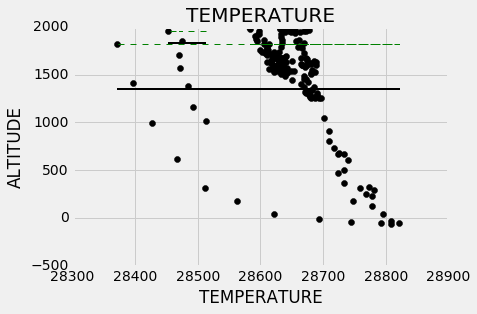

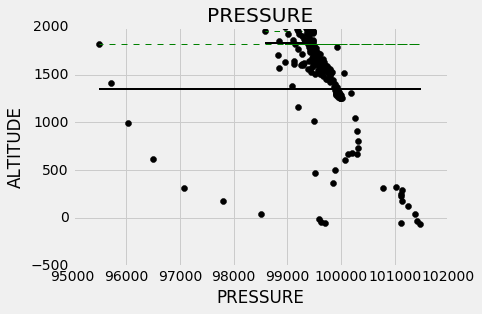

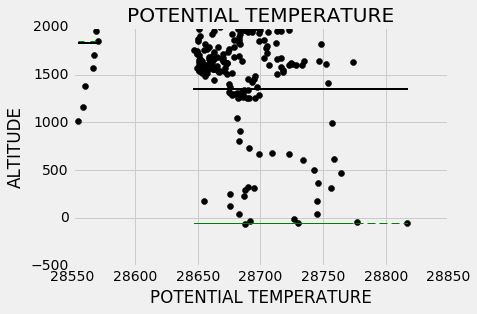

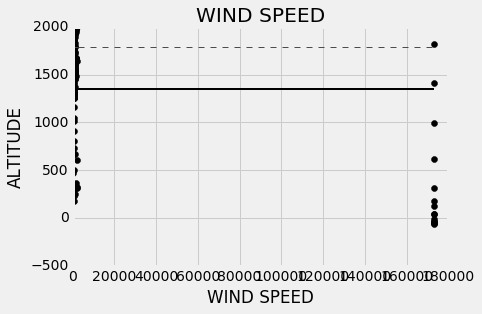

In [514]:
def entry_pbl(flight):
    #find min of change
    [min_index, max_index] = bay_area_entry_exit_indices(flight)
    
    #choose section of flight before the min change index -- takeoff
    takeoff = flight.take(np.arange(min_index, dtype=np.int_))
    
    #find pbl height for this section of the flight by calling find_pbl function
    pbl_1 = find_pbl(takeoff)
    
    return pbl_1
    
    
def exit_pbl(flight):
    #find max of change
    [min_index, max_index] = bay_area_entry_exit_indices(flight)
    
    #choose section of flight after change index -- landing
    number_of_rows = flight.num_rows
    landing = flight.take(np.arange(max_index, number_of_rows, dtype=np.int_))
    
    
    #find pbl height for this section of the flight by calling find_pbl function
    pbl_2 = find_pbl(landing)
    
    return pbl_2
    
entry_pbl(AJet_20131118)
exit_pbl(AJet_20131118)
 

## Helpful Functions for Looking at Graphs!

Remove the '#' and run the cell to see what the function does! Keep the example functions commented out if you aren't using them, since they can take up runtime.

In [515]:
#AJet_20160504

In [516]:
#AJet_20151007 #show header and ten rows of data

In [517]:
#AJet_20151007.show() #show the entire table

In [518]:
#AJet_20151007.hist('T') #histogram of columns

In [519]:
#np.average(AJet_20151007.column('T')) #average

In [520]:
#np.max(AJet_20151007.column('T'))-np.min(AJet_20151007.column('T')) #min and max

In [521]:
#np.std(AJet_20151007.column('T')) #standard deviation

## Find PBL Altitude for All Flights

In [522]:
#profile(AJet_20130717)

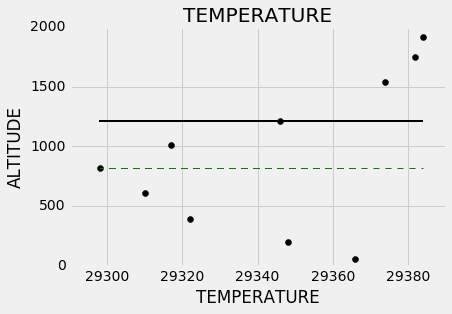

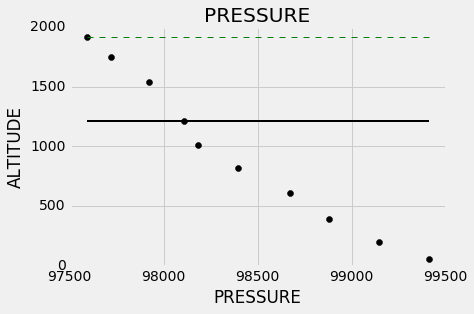

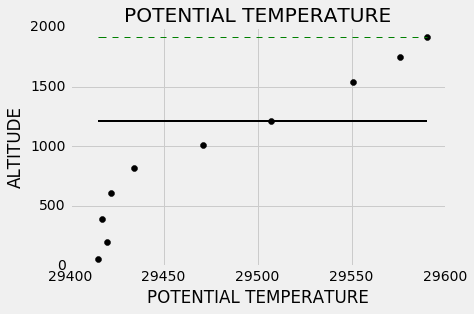

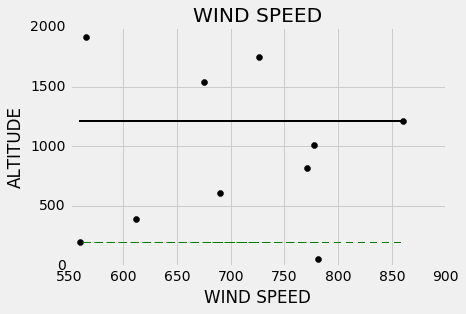

In [523]:
profile1(AJet_20130910)

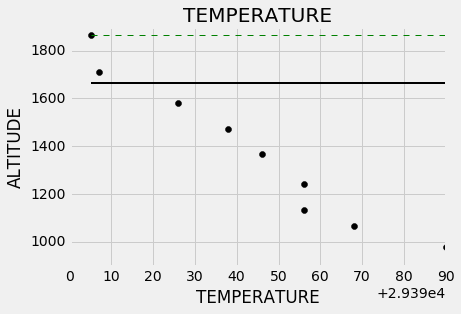

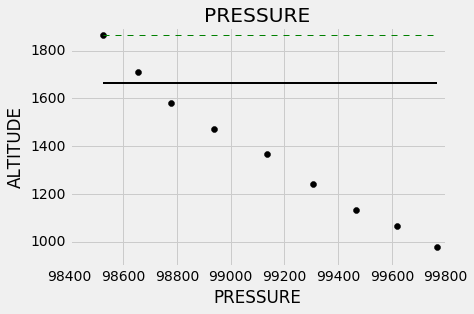

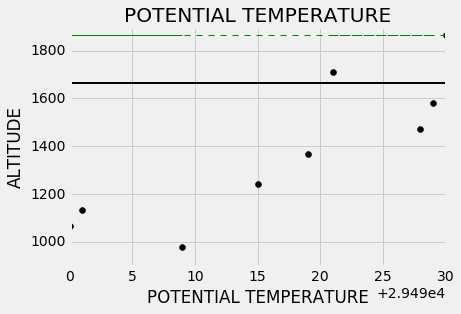

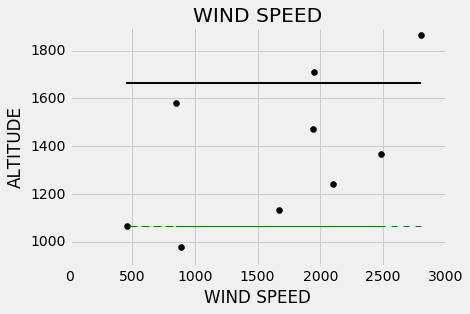

In [524]:
profile2(AJet_20130910)

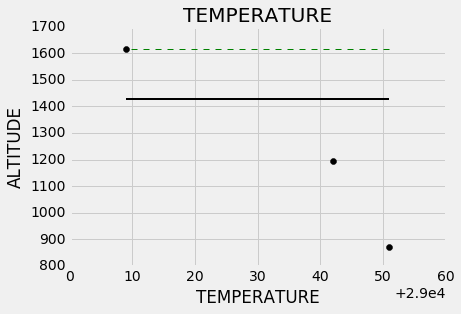

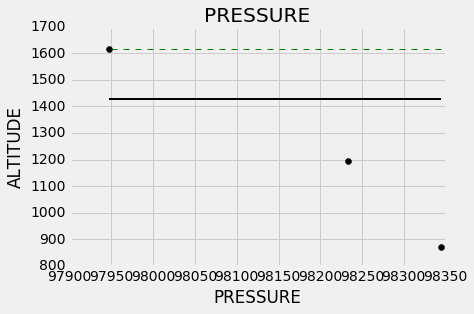

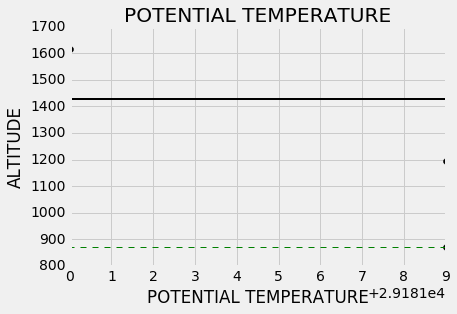

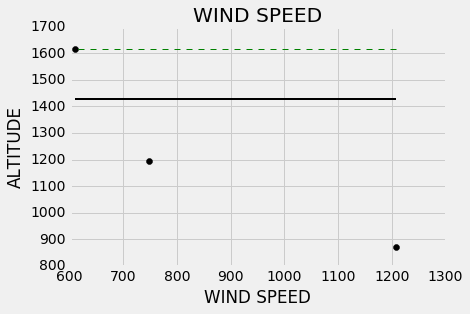

In [525]:
profile1(AJet_20130912)

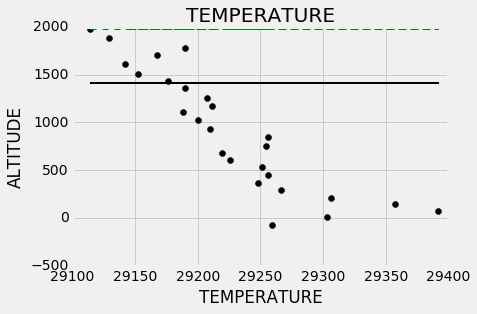

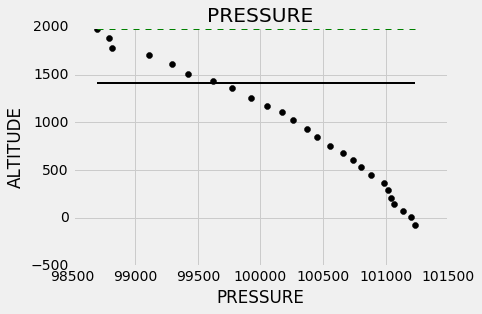

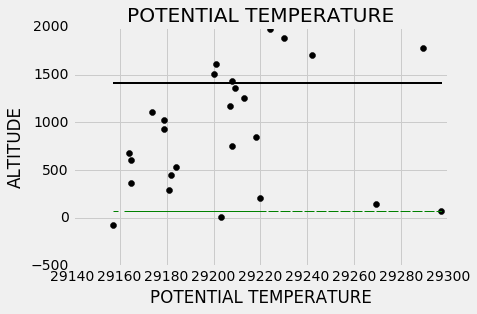

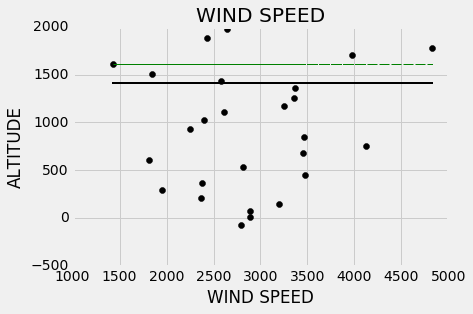

In [526]:
profile2(AJet_20130912)

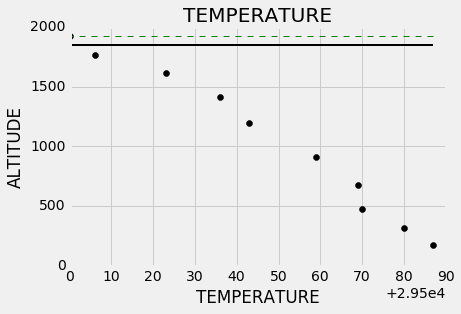

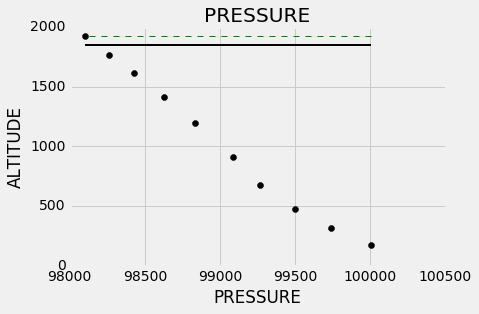

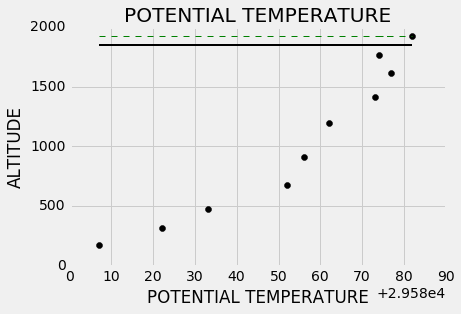

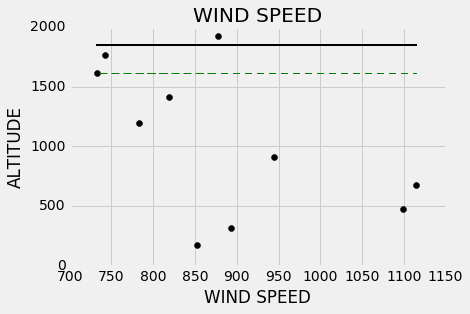

In [527]:
profile1(AJet_20130918)

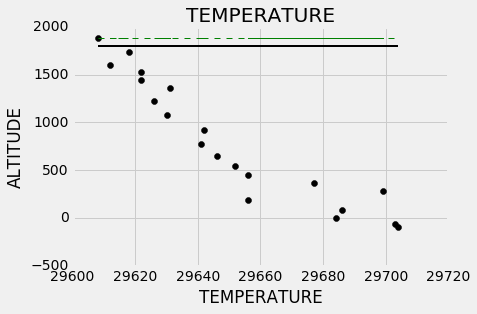

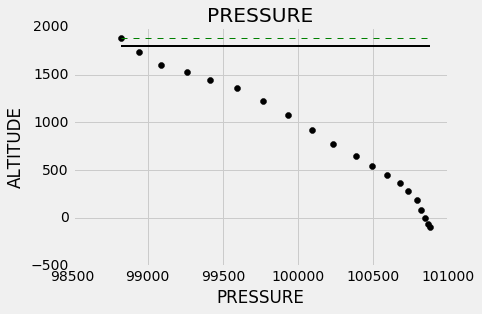

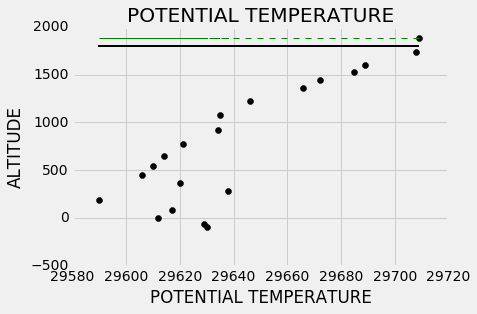

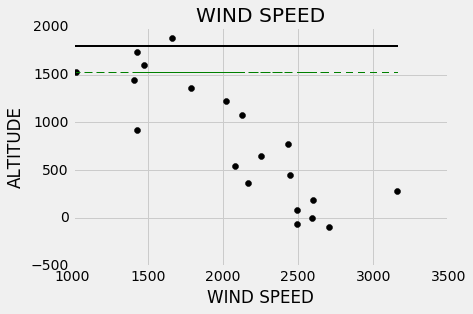

In [528]:
profile2(AJet_20130918)

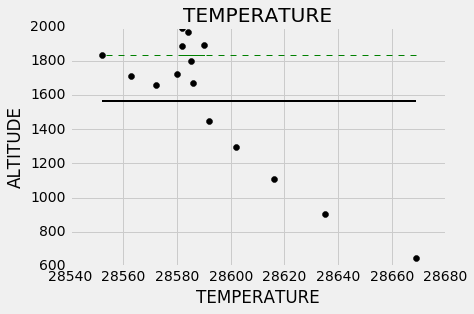

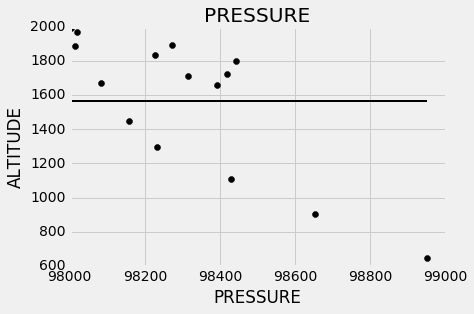

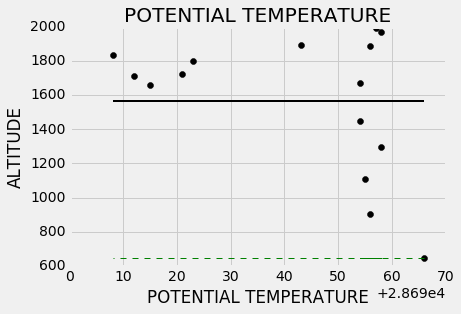

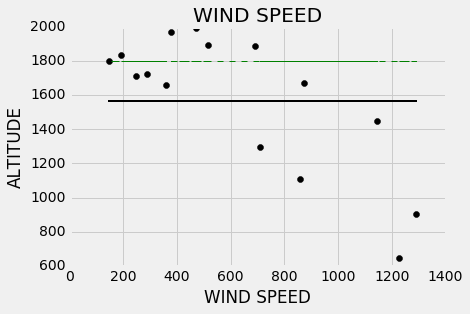

In [529]:
profile1(AJet_20131029)

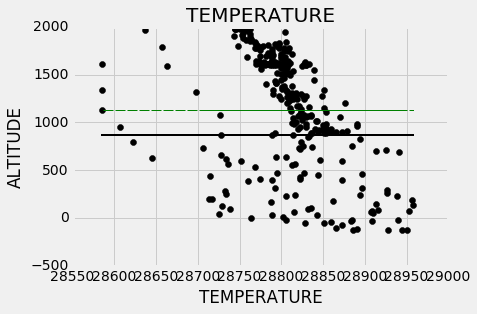

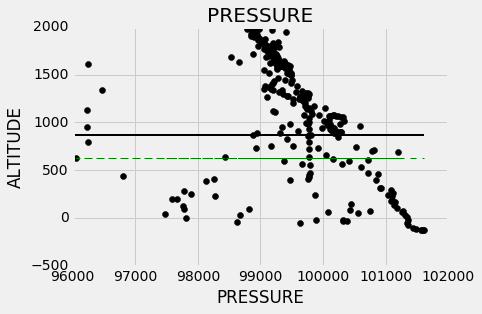

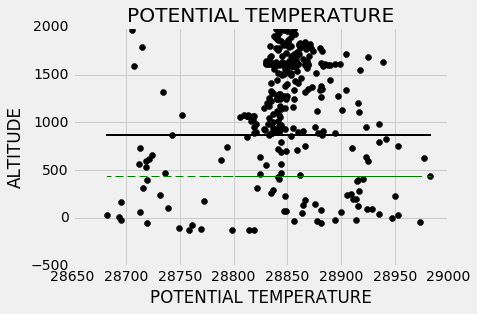

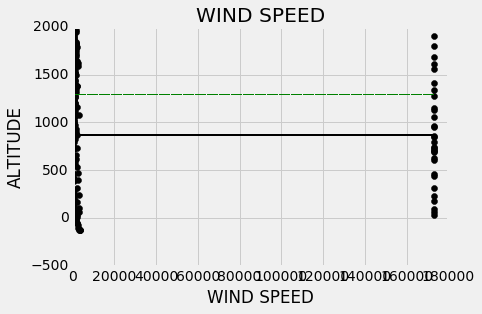

In [530]:
profile2(AJet_20131029)

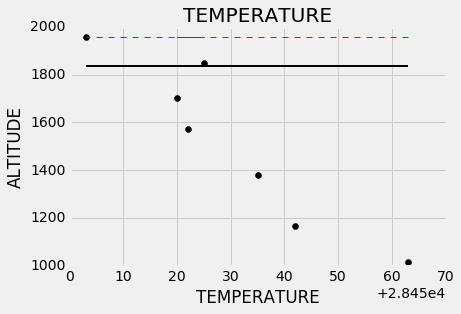

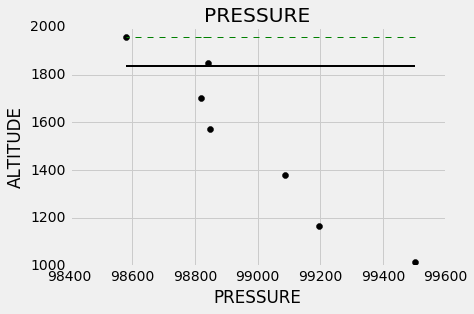

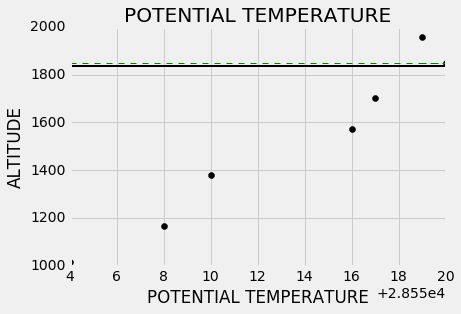

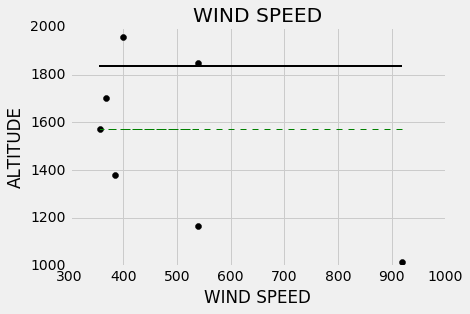

In [531]:
profile1(AJet_20131118)

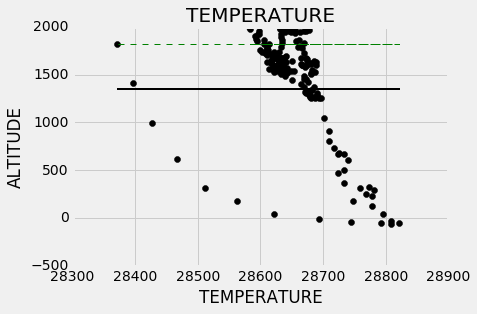

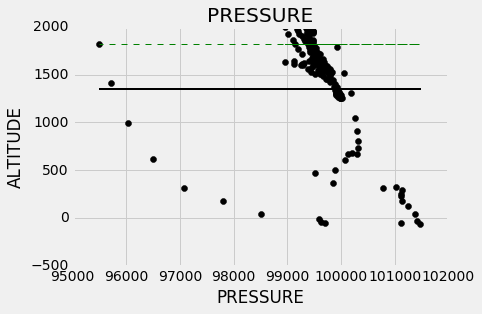

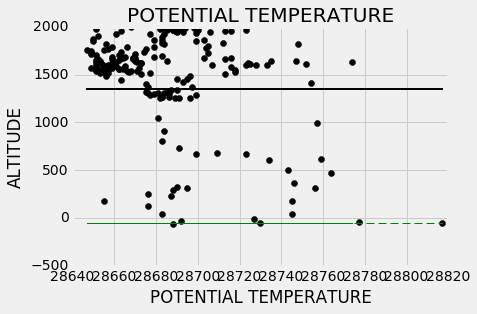

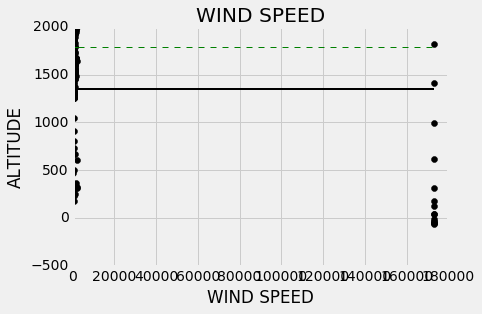

In [532]:
profile2(AJet_20131118)

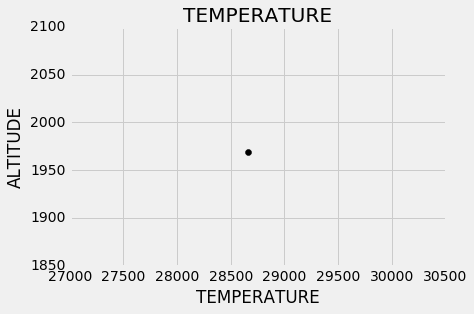

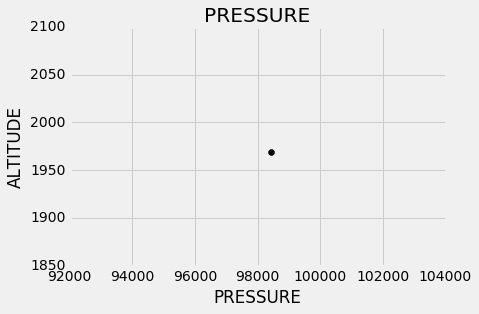

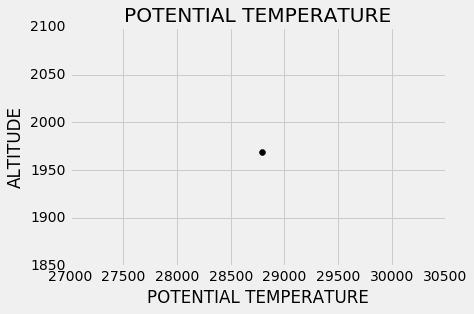

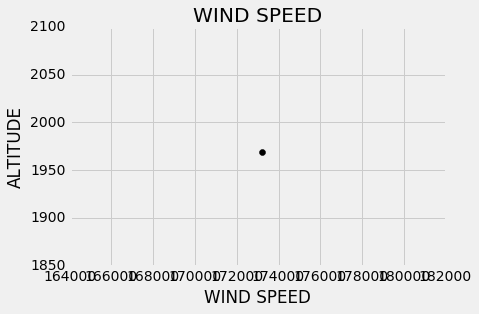

In [533]:
profile1(AJet_20131126)

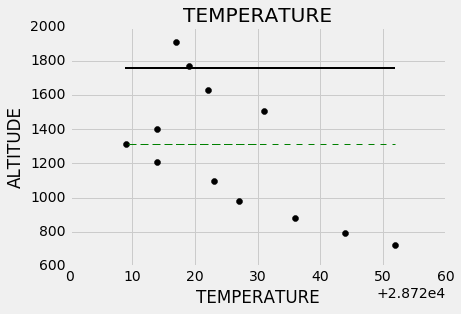

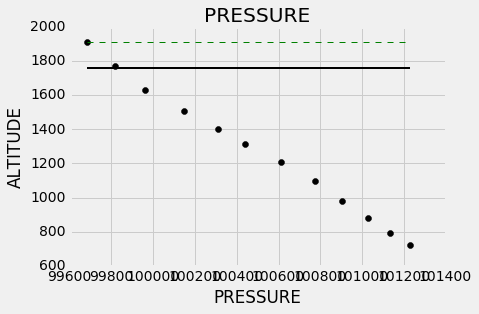

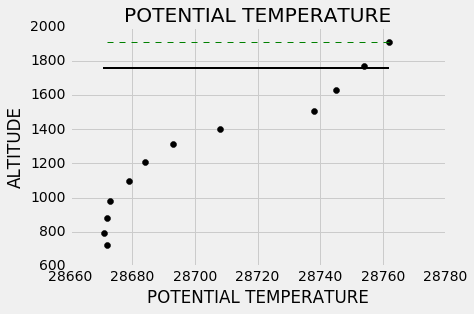

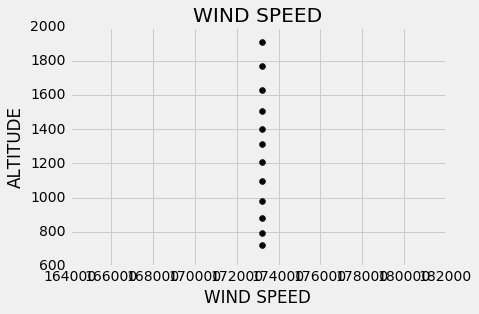

In [534]:
profile2(AJet_20131126)

In [535]:
profile1(AJet_20131205)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
profile2(AJet_20131205)

In [ ]:
profile1(AJet_20140213)

In [ ]:
profile2(AJet_20140213)

In [ ]:
profile1(AJet_20140305)

In [ ]:
profile2(AJet_20140305)

In [ ]:
profile1(AJet_20140313)

In [ ]:
profile2(AJet_20140313)

In [ ]:
profile1(AJet_20140403)

In [ ]:
profile2(AJet_20140403)

In [ ]:
profile1(AJet_20140424)

In [ ]:
profile2(AJet_20140424)

In [ ]:
profile1(AJet_20140501)

In [ ]:
profile2(AJet_20140501)

In [ ]:
profile1(AJet_20140508)

In [ ]:
profile2(AJet_20140508)

In [ ]:
profile1(AJet_20140514)

In [ ]:
profile2(AJet_20140514)

In [ ]:
profile1(AJet_20140519)

In [ ]:
profile2(AJet_20140519)

In [ ]:
profile1(AJet_20140528)

In [ ]:
profile2(AJet_20140528)

In [ ]:
profile1(AJet_20140603)

In [ ]:
profile2(AJet_20140603)

In [ ]:
profile1(AJet_20140604)

In [ ]:
profile2(AJet_20140604)

In [ ]:
profile1(AJet_20140610)

In [ ]:
profile2(AJet_20140610)

In [ ]:
profile1(AJet_20140618)

In [ ]:
profile2(AJet_20140618)

In [ ]:
profile1(AJet_20140624)

In [ ]:
profile2(AJet_20140624)

In [ ]:
profile1(AJet_20140625)

In [ ]:
profile2(AJet_20140625)

In [ ]:
profile1(AJet_20140627)

In [ ]:
profile2(AJet_20140627)

In [ ]:
profile1(AJet_20140628)

In [ ]:
profile2(AJet_20140628)

In [ ]:
profile1(AJet_20140715)

In [ ]:
profile2(AJet_20140715)

In [ ]:
profile1(AJet_20140725)

In [ ]:
profile2(AJet_20140725)

In [ ]:
profile1(AJet_20140729)

In [ ]:
profile2(AJet_20140729)

In [ ]:
profile1(AJet_20140806)

In [ ]:
profile2(AJet_20140806)

In [ ]:
profile1(AJet_20140813)

In [ ]:
profile2(AJet_20140813)

In [ ]:
profile1(AJet_20140829)

In [ ]:
profile2(AJet_20140829)

In [ ]:
profile1(AJet_20140829)

In [ ]:
profile2(AJet_20140829)

In [ ]:
profile1(AJet_20140902)

In [ ]:
profile2(AJet_20140902)

In [ ]:
profile1(AJet_20140909)

In [ ]:
profile2(AJet_20140909)

In [ ]:
profile1(AJet_20140916)

In [ ]:
profile2(AJet_20140916)

In [ ]:
profile1(AJet_20140922)

In [ ]:
profile2(AJet_20140922)

In [ ]:
profile1(AJet_20141002)

In [ ]:
profile2(AJet_20141002)

In [ ]:
profile1(AJet_20141024)

In [ ]:
profile2(AJet_20141024)

In [ ]:
profile1(AJet_20141106)

In [ ]:
profile2(AJet_20141106)

In [ ]:
profile1(AJet_20141110)

In [ ]:
profile2(AJet_20141110)

In [ ]:
profile1(AJet_20141125)

In [ ]:
profile2(AJet_20141125)

In [ ]:
profile1(AJet_20150318)

In [ ]:
profile2(AJet_20150318)

In [ ]:
profile1(AJet_20150325)

In [ ]:
profile2(AJet_20150325)

In [ ]:
profile1(AJet_20150331)

In [ ]:
profile2(AJet_20150331)

In [ ]:
profile1(AJet_20150414)

In [ ]:
profile2(AJet_20150414)

In [ ]:
profile1(AJet_20150424)

In [ ]:
profile2(AJet_20150424)

In [ ]:
profile1(AJet_20150512)

In [ ]:
profile2(AJet_20150512)

In [ ]:
profile1(AJet_20150519)

In [ ]:
profile2(AJet_20150519)

In [ ]:
profile1(AJet_20150527)

In [ ]:
profile2(AJet_20150527)

In [ ]:
profile1(AJet_20150602)

In [ ]:
profile2(AJet_20150602)

In [ ]:
profile1(AJet_20150611)

In [ ]:
profile2(AJet_20150611)

In [ ]:
profile1(AJet_20150629)

In [ ]:
profile2(AJet_20150629)

In [ ]:
profile1(AJet_20150701)

In [ ]:
profile2(AJet_20150701)

In [ ]:
profile1(AJet_20150722)

In [ ]:
profile2(AJet_20150722)

In [ ]:
profile1(AJet_20150729)

In [ ]:
profile2(AJet_20150729)

In [ ]:
profile1(AJet_20150805)

In [ ]:
profile2(AJet_20150805)

In [ ]:
profile1(AJet_20150819)

In [ ]:
profile2(AJet_20150819)

In [ ]:
profile1(AJet_20150924)

In [ ]:
profile2(AJet_20150924)

In [ ]:
profile1(AJet_20151001)

In [ ]:
profile2(AJet_20151001)

In [ ]:
profile1(AJet_20151007)

In [ ]:
profile2(AJet_20151007)

In [ ]:
profile1(AJet_20151022)

In [ ]:
profile2(AJet_20151022)

In [ ]:
profile1(AJet_20151117)

In [ ]:
profile2(AJet_20151117)

In [ ]:
profile1(AJet_20151204)

In [ ]:
profile2(AJet_20151204)

In [ ]:
profile1(AJet_20151209)

In [ ]:
profile2(AJet_20151209)

In [ ]:
profile1(AJet_20151215)

In [ ]:
profile2(AJet_20151215)

In [ ]:
profile1(AJet_20160108)

In [ ]:
profile2(AJet_20160108)

In [ ]:
profile1(AJet_20160112)

In [ ]:
profile2(AJet_20160112)

In [ ]:
profile1(AJet_20160310)

In [ ]:
profile2(AJet_20160310)

In [ ]:
profile1(AJet_20160317)

In [ ]:
profile2(AJet_20160317)

In [ ]:
profile1(AJet_20160323)

In [ ]:
profile2(AJet_20160323)

In [ ]:
profile1(AJet_20160330)

In [ ]:
profile2(AJet_20160330)

In [ ]:
profile1(AJet_20160419)

In [ ]:
profile2(AJet_20160419)

In [ ]:
profile1(AJet_20160426)

In [ ]:
profile2(AJet_20160426)

In [ ]:
profile1(AJet_20160504)

In [ ]:
profile2(AJet_20160504)

In [ ]:
profile1(AJet_20160519)

In [ ]:
profile2(AJet_20160519)

In [ ]:
profile1(AJet_20160603)

In [ ]:
profile2(AJet_20160603)

In [ ]:
profile1(AJet_20160615)

In [ ]:
profile2(AJet_20160615)